**Kaggle team name**: 🐧1-[Your fancy Kaggle group name]-Bollineni,Rivas,Sahi
1. Format: `🐧[BB Team#]-[Your fancy Kaggle group name]-[Students' names]`. 
  1. Eg. `🐧A-Heros-Fleischer,Melnikov`, where 🐧 identifies JHU and `A` identifies the Canvas group code

Your private LB score must be reproducible with this Colab. Seed all [RNG](https://en.wikipedia.org/wiki/Random_number_generation). Don't exceed runtime quota.

<small><hr style="margin:0;background-color:silver"><font color=gray>Notebook author: <a href="https://www.linkedin.com/in/olegmelnikov/" target="_blank">Oleg Melnikov</a>, ©<a href="https://apps.ep.jhu.edu/course-homepages/3765-605-742-deep-neural-networks" target="_blank">JHU</a> 2021 onwards</font></small>

<hr color=red>

# **🏆☢️Radon**


<details><summary><font color=darkblue>More info and Kaggle API instructions</font></summary>

[Kaggle competition URL](https://www.kaggle.com/c/1-10-22-radon/rules). See competition rules, submission, grading, dataset, and performance metric. The **starter code** below produces a baseline model, which you should beat, while respecting the competition rules. Your code starts after the timer. This is your baseline model. Seed all [RNG](https://en.wikipedia.org/wiki/Random_number_generation) for reproducibility!

**Instructions for enabling Kaggle API in Colab**:
1. Accept competition rules before running [Kaggle API](https://github.com/Kaggle/kaggle-api#api-credentials). [Loading Kaggle dataset example](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab)
1. In your Kaggle Account, [Create API Token](https://github.com/Kaggle/kaggle-api#api-credentials) and save the resulting **kaggle.json** file to the [root of your Google Drive](https://drive.google.com/drive/u/0/my-drive) 
2. In Colab, open **Files** panel 🗀 (on the left) and click gray folder icon <font color=gray>🖿</font> to mount your Google drive

Your Kaggle/Google Drive credentials are secure; and Colab's kaggle.json only lasts a Colab session.

</details>

## **Starter code (do not modify)**

In [ ]:
from google.colab import drive; drive.mount('/content/drive')   # OK to enable, if kaggle.json is stored in Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip -q install --upgrade --force-reinstall --no-deps kaggle > log  # upgrade kaggle package (to avoid a warning)
!mkdir -p ~/.kaggle                               # .kaggle folder must contain kaggle.json for kaggle executable to properly authenticate you to Kaggle.com
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json >log  # First, download kaggle.json from kaggle.com (in Account page) and place it in the root of mounted Google Drive
!cp kaggle.json ~/.kaggle/kaggle.json > log       # Alternative location of kaggle.json (without a connection to Google Drive)
!chmod 600 ~/.kaggle/kaggle.json                  # give only the owner full read/write access to kaggle.json
!kaggle config set -n competition -v 1-10-22-radon # set the competition context for the next few kaggle API calls. !kaggle config view - shows current settings
!kaggle competitions download >> log              # download competition dataset as a zip file
!unzip -o *.zip >> log                            # Kaggle dataset is copied as a single file and needs to be unzipped.
# !kaggle competitions leaderboard --show           # print public leaderboard

cp: cannot stat 'kaggle.json': No such file or directory
- competition is now set to: 1-10-22-radon


In [ ]:
!pip -q install -U tfds-nightly tensorflow_addons tensorflow > log

In [ ]:
%%time
%%capture
%reset -f
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all" 
import numpy as np, pandas as pd, time, tensorflow_addons as tfa, tensorflow as tf, tensorflow.keras as keras, os
from keras.layers import Flatten, Dense
os.environ['TF_DETERMINISTIC_OPS'] = '1'  # not sure if this helps seeding GPU
ToCSV = lambda df, fname: df.round(2).to_csv(f'{fname}.csv', index_label='id') # rounds values to 2 decimals

class Timer():
  def __init__(self, lim:'RunTimeLimit'=60): self.t0, self.lim, _ = time.time(), lim, print(f'⏳ started. You have {lim} sec. Good luck!')
  def ShowTime(self):
    msg = f'Runtime is {time.time()-self.t0:.0f} sec'
    print(f'\033[91m\033[1m' + msg + f' > {self.lim} sec limit!!!\033[0m' if (time.time()-self.t0-1) > self.lim else msg)

np.set_printoptions(linewidth=100, precision=2, edgeitems=2, suppress=True)
pd.set_option('max_columns', 20, 'precision', 2, 'display.max_rows', 4)

CPU times: user 3 s, sys: 325 ms, total: 3.33 s
Wall time: 3.87 s


In [ ]:
df_raw = pd.read_csv('XY_radon.csv'); df_raw

,Uppm,adjwt,basement,cntyfips,county,dupflag,floor,lat,lon,pcterr,...,stfips,stopdt,stoptm,stratum,typebldg,wave,windoor,zip,zipflag,Y
0,1.80,54.97,Y,59,MORTON,0,1,46.66,-101.39,7.76,...,38,32206,1230,2,2,1,NaN,58554,0,NaN
1,1.65,499.34,N,85,KOSCIUSKO,0,1,40.85,-86.22,55.02,...,18,11497,1430,3,1,32,NaN,46580,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12571,0.44,394.07,Y,3,ANOKA,0,0,44.91,-92.86,9.40,...,27,32110,1500,2,1,4,NaN,55303,0,8.6
12572,2.71,157.82,Y,15,MOHAVE,0,0,36.01,-113.21,14.46,...,4,11496,1330,1,1,38,NaN,86403,0,1.9


In [ ]:
tmr = Timer()

⏳ started. You have 60 sec. Good luck!


<hr color=red>

<font size=5>⏳</font> <strong><font color=orange size=5>Your Code, Documentation, Ideas and Timer - All Start Here...</font></strong>

**Student's Section** (between ⏳ symbols): add your code and documentation here.

## **Task 1. Preprocessing Approach**
 
Explain elements of your preprocessing pipeline i.e. feature engineering, subsampling, clustering, dimensionality reduction, etc. 
1. Why did you choose these elements? (Something in EDA, prior experience,...? Btw, EDA is not required)
1. How do you evaluate the effectiveness of these elements? 
1. What else have you tried that worked or didn't? 

**Student's answer:**
1.	We noticed that we have features that represent geographical location, i.e. lon and lat features. Longitude and latitude features did not seem helpful by themselves, so we can perform some feature engineering. We decided to replace these features with a distance to radon sources. This adds meaning to the lon and lat features which we replaced with the minimum distance to the radon source. We determined the possible radon sources as ones that had the maximum target variable after kmeans clustering. The feature datatypes were checked to determine which features were categorical and which were numerical. Rather than dropping the categorical variables like the base model, we decided to one hot encode the categorical features. When looking into the dataset, some of the features were not helpful such as two state features or a windoor feature which was entirely filled with NaNs.
2.	We evaluated the effectiveness primarily by the MSE for the predictions. We tried different preprocessing methods and checked the performance based on MSE. Since we were using a DNN model, we were also able to see the MSE for the training and validation set at each epoch. Additionally, we also used the elbow method for the clustering to determine the optimal value of k for kmeans clustering.
3.	The basement feature contained both a 0 value which represents unknown NaN values. We replaced the 0 feature to be a NaN and one hot encoded these values. We used the tensorflow preprocessing method which uses an out of vocabulary value. One hot encoding the categorical variables helped considerably. Instead of losing information by dropping nonnumerical features, it was better to onehotencode and convert the features to tensors before feeding them into our model. We also replaced unnecessary latitude and longitude features with distance to possible radon sources feature. We clustered the data to find similar datapoints as the ones with the largest target variable and found the distances to those points. We tried PCA but it wasn’t helpful, finding distances between all points which was computationally expensive, and  different scalars which did not improve the model. We also tried textual embeddings especially the state features, but this did not help.

## **Task 2. Modeling Approach**
Explain your modeling approach, i.e. ideas you tried and why you thought they would be helpful. 

1. How did these decisions guide you in modeling?
1. How do you evaluate the effectiveness of these elements? 
1. What else have you tried that worked or didn't? 

**Student's answer:**
1.	We were restricted to the DNN models using tensorflow. We used DNN model with callbacks, batchnormalization, and early stopping. We made the DNN deep considering the number of features that are in this dataset. We also increase the number of neurons in each layer since we have many datapoints. Because of the number of neurons was large, we added dropout to remove unnecessary neurons and increase the speed of execution. We added a learn rate schedule to decay the learning rate at the large epochs to increase precision. 
2.	Since MSE is the evaluation criteria, we monitored it the most. We tracked the MSE after running the model with different parameters. We also used early stopping and monitored MSE to improve the speed of the model. We limited the number of layers, neurons, and epochs to run the model less than a minute. We also tracked the MSE and validation MSE after each epoch.
3.	We tried different models to see what performed well. We tried to use sentence embedding and using model that works for that however this did not work for us. We tried different activation functions and keras initializers. We hyperparameter tuned the model by the number of epochs, layer depth, number of neurons, batch size, learning rate, dropout, and callbacks. We used the parameters the improved the performance based on the MSE. We also ran the fit method of the DNN model twice to see if we improved the performance. However, this made the model overfit. Even with our current model, there is some overfitting since we see that the MSE after running the model does not match the Kaggle MSE. However, our model was the best MSE of the ones that we submitted.

In [ ]:
# Check feature dtypes
df_raw.select_dtypes(include=np.number).info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12573 entries, 0 to 12572
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Uppm      12573 non-null  float64
 1   adjwt     12573 non-null  float64
 2   cntyfips  12573 non-null  int64  
 3   dupflag   12573 non-null  int64  
 4   floor     12573 non-null  int64  
 5   lat       12573 non-null  float64
 6   lon       12573 non-null  float64
 7   pcterr    12573 non-null  float64
 8   region    12573 non-null  int64  
 9   rep       12573 non-null  int64  
 10  room      12573 non-null  int64  
 11  startdt   12573 non-null  int64  
 12  starttm   12573 non-null  int64  
 13  stfips    12573 non-null  int64  
 14  stopdt    12573 non-null  int64  
 15  stoptm    12573 non-null  int64  
 16  stratum   12573 non-null  int64  
 17  typebldg  12573 non-null  int64  
 18  wave      12573 non-null  int64  
 19  windoor   0 non-null      float64
 20  zip       12573 non-null  in

In [ ]:
# Check which feature types are object, these need to be OneHotEncoded
df_raw.select_dtypes(include=object).info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12573 entries, 0 to 12572
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   basement  11897 non-null  object
 1   county    12550 non-null  object
 2   state     12573 non-null  object
 3   state2    12573 non-null  object
dtypes: object(4)
memory usage: 393.0+ KB


In [ ]:
# Remove features that do not help based on knowlege of the data
undesired = ['windoor', 'county', 'state', 'cntyfips', 'stfips', 'wave']
df = df_raw.drop(undesired, axis=1)  # drop undesired columns
vX = df.query('Y!=Y').drop('Y', axis=1)    # slice a test sample
tXY = df.query('Y==Y')                     # slice training sample
tX, tY = tXY.drop('Y', axis=1), tXY.Y.astype(int)      # split into training I/O
print(tY.tolist()[:50])                    # train outputs

[0, 6, 17, 0, 7, 4, 10, 3, 2, 1, 1, 2, 0, 1, 1, 3, 1, 5, 7, 3, 6, 15, 21, 1, 16, 1, 22, 6, 2, 1, 0, 5, 0, 0, 2, 1, 0, 1, 0, 0, 0, 2, 4, 4, 7, 2, 3, 2, 0, 1]


In [ ]:
tX.columns

Index(['Uppm', 'adjwt', 'basement', 'dupflag', 'floor', 'lat', 'lon', 'pcterr',
       'region', 'rep', 'room', 'startdt', 'starttm', 'state2', 'stopdt',
       'stoptm', 'stratum', 'typebldg', 'zip', 'zipflag'],
      dtype='object')

In [ ]:
# Basement feature has NaNs and 0 values which are unknown
tX['basement'].value_counts()

Y    4233
N    1685
0      32
Name: basement, dtype: int64

In [ ]:
# Replace NaN with '0' which is unknown
tX = tX.replace({'basement':np.nan}, '0')

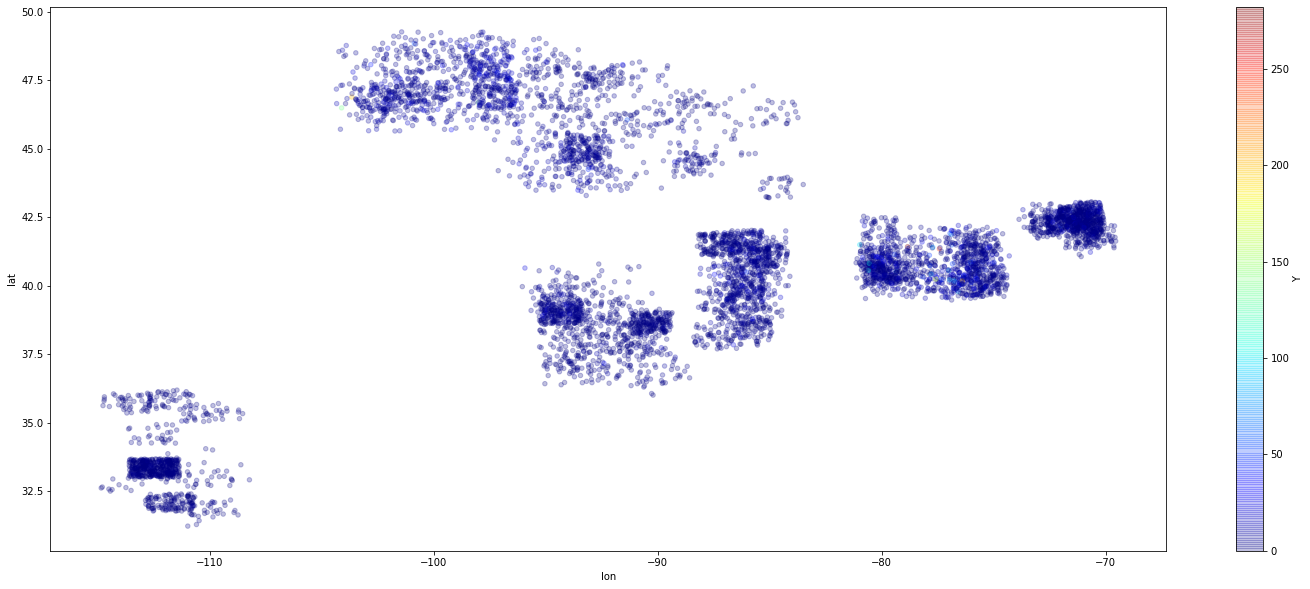

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Graph our data by latitude and longitude with color of the target variable
tXY.plot(kind="scatter", x="lon", y="lat", alpha=0.25, figsize=(25,10), c="Y", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Elbow Curve')

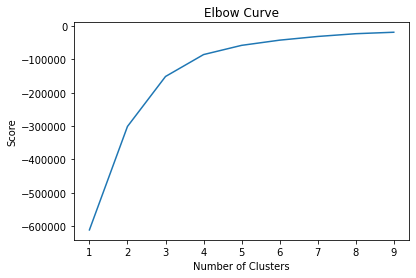

In [ ]:
# KMean can help determine our Radon Sources based on clustering with geography
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt

K_clusters = range(1,10)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = tXY[['Y']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize to see how many clusters to choose
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
# Perform KMeans clustering 
tXY_clust = tXY.select_dtypes(include=np.number)
vX_clust = vX.select_dtypes(include=np.number)

# Elbow of graph above is at k=3
kmeans = KMeans(n_clusters=3, init ='k-means++')
kmeans.fit(tXY_clust) # Compute k-means clustering

tXY_clust['cluster_label'] = kmeans.fit_predict(tXY_clust)

# Getting the Centroids
centroids = kmeans.cluster_centers_

tX.head(10)

KMeans(n_clusters=3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Uppm,adjwt,basement,dupflag,floor,lat,lon,pcterr,region,rep,room,startdt,starttm,state2,stopdt,stoptm,stratum,typebldg,zip,zipflag
6286,2.61,395.16,N,0,1,34.37,-111.84,0.00,2,4,1,51786,2212,AZ,52090,2212,2,5,86333,0
6287,1.43,182.05,Y,0,0,48.97,-101.02,5.06,5,3,5,22676,1800,ND,22900,1800,4,1,58761,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6294,2.54,295.27,Y,0,0,41.23,-80.82,8.55,4,4,4,20269,1300,PA,21210,1300,1,1,16105,0
6295,0.82,2295.93,Y,1,0,44.67,-92.77,26.00,3,2,4,122624,1825,MN,122950,1905,5,1,55115,0


In [ ]:
# Get target varaible of our Radon Sources
tXY_clust.groupby(['cluster_label'], sort=False)['Y'].max().tolist()

[199.2, 282.0, 200.6]

In [ ]:
# Get Radon sources index
idx_max = []

for i in range(3):
  idx_max.append(tXY_clust.loc[tXY_clust['cluster_label']== i].Y.idxmax())

idx_max

[7545, 9121, 11159]

In [ ]:
# Haversine method is better than using Euclidean distance on longitude and latitude
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    #haversine fomula
    a = np.sin((lat2-lat1)/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2
    return earth_radius * 2 * np.arcsin(np.sqrt(a))

# https://stackoverflow.com/questions/40452759/pandas-latitude-longitude-to-distance-between-successive-rows

In [ ]:
# Get longitude and latitude of each Radon sources
for i in range(3):
  lon_val = tXY_clust['lon'].loc[idx_max[i]]
  lat_val = tXY_clust['lat'].loc[idx_max[i]]
  print(f'lon: {lon_val}   lat: {lat_val}')

lon: -78.851   lat: 41.424
lon: -103.663   lat: 46.883
lon: -76.405   lat: 40.172


In [ ]:
# Calculate distance to all Radon Source for each datapoint using the Haversine formula
for i in range(3):
  lat_val = tXY_clust['lat'].loc[idx_max[i]]
  lon_val = tXY_clust['lon'].loc[idx_max[i]]
  col_name = 'dist' + str(i)
  tXY_clust[col_name] = tXY_clust.apply(lambda row : haversine(lat_val, lon_val, row['lat'], row['lon']), axis=1)
  vX_clust[col_name] = vX_clust.apply(lambda row : haversine(lat_val, lon_val, row['lat'], row['lon']), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
# Replace distance to all Radon Sources with a feature of distance to the closest Radon source
tXY_clust['distToSource'] = tXY_clust[['dist0','dist1','dist2']].min(axis=1)
vX_clust['distToSource'] = vX_clust[['dist0','dist1','dist2']].min(axis=1)

# Drop the features that represent the distances to each radon source
tXY_clust = tXY_clust.drop(['dist0','dist1','dist2'], axis=1)
vX_clust = vX_clust.drop(['dist0','dist1','dist2'], axis=1)

<Figure size 1800x720 with 0 Axes>

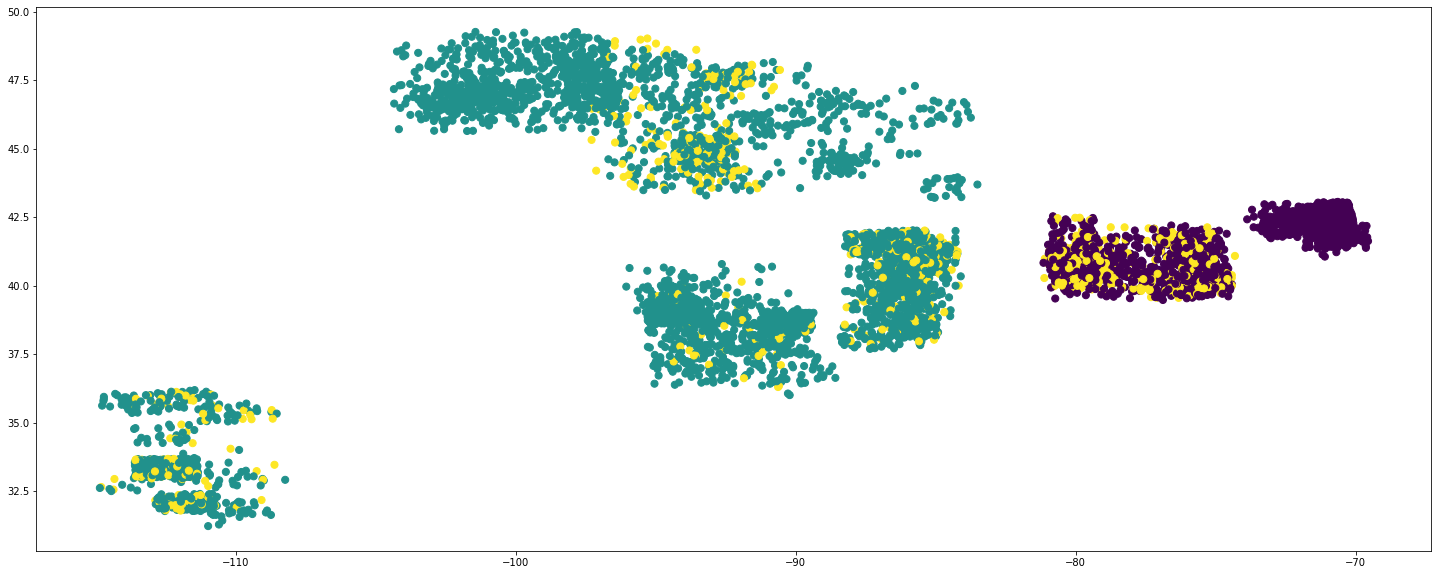

In [ ]:
# Plot our datapoints based on the location with color representing differnt clusters
plt.figure(figsize=(25,10))
plt.scatter(tXY_clust['lon'], tXY_clust['lat'], c=tXY_clust['cluster_label'], s=50, cmap='viridis')

In [ ]:
# Change our feature to numpy
tX_dists = tXY_clust[['distToSource']].copy().to_numpy()
vX_dists = vX_clust[['distToSource']].copy().to_numpy()

In [ ]:
# Define a tensorflow one hot encode method
def tf_onehot_method(train_df, test_df, column_list):
  train_dict = dict() # Dictionary to hold each OneHotEncoded feature
  test_dict = dict()

  # For each catetgorical feature, we one hot encode
  for i in range(len(column_list)):
    
    # Convert all feature dtypes to string
    train_df[column_list[i]] = train_df[column_list[i]].astype(str)
    test_df[column_list[i]] = test_df[column_list[i]].astype(str)

    # Create a table of vocab or unique values in each categorical feature
    vocab = train_df[column_list[i]].unique().tolist()
    indices = tf.range(len(vocab), dtype=tf.int64)
    table_init = tf.lookup.KeyValueTensorInitializer(vocab,indices)
    num_oov = 1
    table = tf.lookup.StaticVocabularyTable(table_init,num_oov)

    # Convert desired feature and datapoints to tensor for train dataset
    train_categories = tf.convert_to_tensor(train_df[column_list[i]])
    train_cat_indices = table.lookup(train_categories)

    # Do the same for test dataset 
    test_categories = tf.convert_to_tensor(test_df[column_list[i]])
    test_cat_indices = table.lookup(test_categories)

    # Inssert one hot enocded features into the dictionary
    train_dict[i] = tf.one_hot(train_cat_indices, depth=len(vocab) + num_oov)
    test_dict[i] = tf.one_hot(test_cat_indices, depth=len(vocab) + num_oov)

  return train_dict, test_dict

In [ ]:
# Categorical features in our dataset
cat_col = ['basement', 'state2', 'dupflag', 'floor', 'region', 'rep', 'room']

# OneHotEncode our train and test datasets
tX_onehot_dict, vX_onehot_dict = tf_onehot_method(tX, vX, cat_col)

# Drop all categorical features that were OneHotEncoded
tX_num = tX.drop(cat_col, axis=1)
vX_num = vX.drop(cat_col, axis=1)

# Drop our longitude and latitude features that were already used to get distance to Radon source
tX_num = tX_num.drop(['lon', 'lat'], axis=1)
vX_num = vX_num.drop(['lon', 'lat'], axis=1)

# Add our distance to Radon source feature to the dataset
tX_num = np.concatenate([tX_num, tX_dists], axis=1)
vX_num = np.concatenate([vX_num, vX_dists], axis=1)

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Transform our dataset to be more gaussian
gauss_transform = PowerTransformer()
tX_num = gauss_transform.fit_transform(tX_num)
vX_num = gauss_transform.fit_transform(vX_num)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [ ]:
# Convert our dataframe to tensors
tX_num_tf = tf.convert_to_tensor(tX_num)
vX_num_tf = tf.convert_to_tensor(vX_num)

# Group OneHotEncoded feature tensors from the dictionaries
tX_cat_tf = tf.concat([tX_onehot_dict[x] for x in tX_onehot_dict], 1)
vX_cat_tf = tf.concat([vX_onehot_dict[x] for x in vX_onehot_dict], 1)

# Cast all tensors to be of type tf.float64
tX_num_in = tf.cast(tX_num_tf, tf.float64)
vX_num_in = tf.cast(vX_num_tf, tf.float64)
tX_cat_in = tf.cast(tX_cat_tf, tf.float64)
vX_cat_in = tf.cast(vX_cat_tf, tf.float64)

# Concatonate tensors, OneHotEncoded feature tensors and numerical tensors
tX_in = tf.concat([tX_num_in, tX_cat_in], 1)
vX_in = tf.concat([vX_num_in, vX_cat_in], 1)

In [ ]:
# DNN Tensorflow Model
tf.random.set_seed(0)   # always seed your experiments
Init = keras.initializers.GlorotUniform(seed=0) #RandomNormal(seed=0)
import numpy as np
from keras.layers import BatchNormalization

early_stop=tf.keras.callbacks.EarlyStopping(monitor='mse', restore_best_weights=True, patience=40, min_delta=0.00005)

def lr_scheduler(epoch, lr):
  lr_init = 0.0001
  if epoch < 15:
    return lr + lr_init
  else:
    new_lr = lr - lr_init
    return new_lr if new_lr > 0.0003 else lr * 0.9

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

m = keras.models.Sequential([
    Flatten(input_shape=[tX_in.shape[1]]),
    BatchNormalization(),
    Dense(400, activation="elu", kernel_initializer=Init),
    keras.layers.Dropout(rate=.02),
    BatchNormalization(),
    Dense(400, activation="elu", kernel_initializer=Init),
    keras.layers.Dropout(rate=.02),
    BatchNormalization(),
    Dense(400, activation="elu", kernel_initializer=Init),
    keras.layers.Dropout(rate=.02),
    BatchNormalization(),
    Dense(400, activation="elu", kernel_initializer=Init),
    keras.layers.Dropout(rate=.02),
    BatchNormalization(),
    Dense(400, activation="elu", kernel_initializer=Init),
    keras.layers.Dropout(rate=.02),
    BatchNormalization(),
    Dense(1, kernel_initializer=Init)])
m.summary()
m.compile(loss="mse", optimizer=tf.keras.optimizers.Nadam(learning_rate=0.0001), metrics=['mse'])
hist = m.fit(tX_in, tY, epochs=50, validation_split=0.3, batch_size=128, callbacks=[lr_decay_callback])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 400)               26000     
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 400)              1600      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 400)               1

The model generates a baseline submission CSV file, see Colab folder (🗀 on the left), which you candownload and submit to Kaggle.

In [ ]:
pY = pd.DataFrame(m.predict(vX_in), index=np.arange(len(vX_in))+1, columns=['y'])
ToCSV(pY.round(0).astype(int), 'MySubmission')

197/197 [==============================] - 1s 2ms/step


# **References:**

1. https://www.tensorflow.org/api_docs/python/tf/keras/activations/elu


2. https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal


3. https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization


4. Géron, A. (2019). Hands-on machine learning with scikit-learn, keras, and tensorflow: Concepts, tools, and techniques to build intelligent systems (2nd edition). O'Reilly Media.

5. https://keras.io/api/layers/regularization_layers/dropout/

6. https://keras.io/api/layers/regularizers/

7. https://stackoverflow.com/questions/40452759/pandas-latitude-longitude-to-distance-between-successive-rows

8. https://keras.io/api/callbacks/learning_rate_scheduler/

9. https://www.askpython.com/python/examples/plot-k-means-clusters-python



<font size=5>⌛</font> <strong><font color=orange size=5>Do not exceed competition's runtime limit!</font></strong>

<hr color=red>


In [ ]:
tmr.ShowTime()    # measure Colab's runtime. Do not remove. Keep as the last cell in your notebook.

Runtime is 53 sec


# **Starter Ideas**

1. Try different DNN architectures and tuning of hyperparameters
1. Try converting locations to distances to the key Radon sources (which you might need to discover).
1. Try clustering categorical variables by their relation to Radon levels
1. Try replacing categorical values with their level frequencies or other encodings
1. Try scaling features linearly or nonlinearly 
1. Try embedding **textual** values (eg. US States names) with pre-trained SBERT-like models. This injects some additional information from Wikipedia (or whichever corpora were used for model training).
1. Do EDA and understand the variables and their relation to the output. [Example 1](https://docs.pymc.io/en/v3.11.4/pymc-examples/examples/case_studies/multilevel_modeling.html), [Example 2](https://www.tensorflow.org/probability/examples/Multilevel_Modeling_Primer)
 
<hr>
<font color=black>
    <details><summary><font color=carnelian>▶ </font>Clustering categorical variables <b></b>.</summary>
 
  1. When we represent categorical variables as dummies, we may be losing important multivariate information. For example, say we use weekdays to predict the number of hours a person works. We could convert weekdays to 6 features (one is dropped due to collinearity). This requires 6 coefficients (degrees of freedom or sources of uncertainty). Essentially, we have an overparameterized model, whereas all we really need is two clusters of categorical values - weekends (Sat/Sun) and non-weekends (M/T/W/Th/F). In general, the model overparameterized model will do worse due to higher variance of the model output (resulting from the overfit and higher flexibility).
 
  1. Here is another example from the NLP domain, where each word is a feature (or dimension). While morphological variants of a word (eg. run, running, runner, ran, runs, ...) have lower frequency, we cluster them into the same lemma "run", assuming only a small loss of semantic information. We hope that the gain in building a better distribution estimate for "run" is greater than the loss of semantic and lexical information.
        </details>
    <details><summary><font color=carnelian>▶ </font>Distance to Radon source<b></b>.</summary>
    
If you can determine where Radon is most active (i.e. the source), then you might be able to compute the distance to the source. Ordinarily, we expect lower radiation for greater distance from the source (assuming uniform distribution of underground rivers, geology, rains/winds and other weather conditions affecting distribution of radon, etc.). You could also use categorical features in (e.g. US State, region, etc.), but these might perform better when clustered (again). Distance to the source is a real-valued feature, which does not require clustering.
        </details>
</font>